# Tutorial

Make sure to install the `curvature` package first by running

```shell
python setup.py install
```

inside of the `curvature` repo.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

import curvature

%matplotlib inline

## Writing Data
First, write the data. Just using the same sample image repeatedly for a few different dates.

In [7]:
metadata = {
    'cylinder_radius':5,
    'pitch':0.1,
    'thickness':1,
    'width':7,
    'E_value':0.01,
    'A_value':9,
    'coil':0.5
}

In [8]:
for _ in range(3):
    curvature.commit_image('lce_curvature_dbase.h5',
                           '../data/small_r_05_340_2_E35_A5.jpg',
                           np.array([0,50,100]),3,metadata,date='10 31 2016')
curvature.commit_image('lce_curvature_dbase.h5','../data/small_r_05_340_2_E35_A5.jpg',
                       np.array([0,50,100]),3,metadata)
for _ in range(2):
    curvature.commit_image('lce_curvature_dbase.h5',
                           '../data/small_r_05_340_2_E35_A5.jpg',
                           np.array([0,50,100]),3,metadata,date='12 1 2017')

For a large batch of images, just use `os.path.listdir` to list all of the images in the directory and adjust the metadata and date accordingly. 

## Interface
Create an `LCEImage` object using the name of the hdf5 file.

In [9]:
lceimage = curvature.LCEImage('lce_curvature_dbase.h5')

In [13]:
lceimage

/
Datasets
--------
10_31_16
11_06_17
12_01_17

Attributes
----------


Access individual days by index or date.

In [12]:
lceimage['10_31_16']

//10_31_16
Datasets
--------
0
1
2

Attributes
----------


In [14]:
lceimage[1]

//11_06_17
Datasets
--------
0

Attributes
----------


Or iterate through days

In [15]:
for day in lceimage:
    print(day)

//10_31_16
Datasets
--------
0
1
2

Attributes
----------


//11_06_17
Datasets
--------
0

Attributes
----------


//12_01_17
Datasets
--------
0
1

Attributes
----------




Similarly for the images in the day.

In [16]:
lceimage[0][0]

//10_31_16/0
Datasets
--------
image
physical_radii
strain
x_center
y_center

Attributes
----------
cylinder_radius
pitch
thickness
width
E_value
A_value
coil
physical_conversion
x_center_scale
y_center_scale
physical_radius_scale

In [18]:
for image in lceimage[0]:
    print(image['strain'])

[  0  50 100]
[  0  50 100]
[  0  50 100]


## Plot
Quick plot to show the contours. Use the `save2file` keyword to save the image.

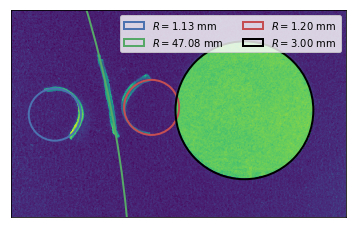

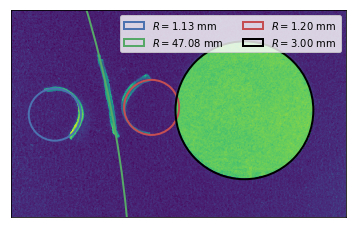

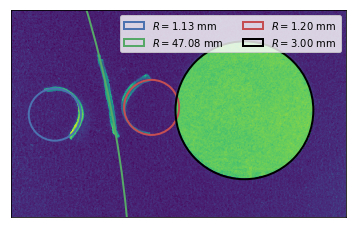

In [22]:
for i,image in enumerate(lceimage[0]):
    image.peek(save2file='../tmp_plots/{}_plot.png'.format(i))

## Export to Pandas
Convert individual images to dataframes or convert whole days or all days.

In [23]:
lceimage[0][0].to_dataframe()

,A_value,E_value,coil,cylinder_radius,date,physical_conversion,physical_radii,physical_radius_scale,pitch,strain,thickness,width,x_center_scale,y_center_scale
0,9,0.01,0.5,5,2016-10-31,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645
1,9,0.01,0.5,5,2016-10-31,0.011598,47.077844,3.0,0.1,50,1,7,876.268487,373.997645
2,9,0.01,0.5,5,2016-10-31,0.011598,1.197809,3.0,0.1,100,1,7,876.268487,373.997645


In [24]:
lceimage['10_31_16'].to_dataframe()

,index,A_value,E_value,coil,cylinder_radius,date,physical_conversion,physical_radii,physical_radius_scale,pitch,strain,thickness,width,x_center_scale,y_center_scale
0,0,9,0.01,0.5,5,2016-10-31,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645
1,1,9,0.01,0.5,5,2016-10-31,0.011598,47.077844,3.0,0.1,50,1,7,876.268487,373.997645
2,2,9,0.01,0.5,5,2016-10-31,0.011598,1.197809,3.0,0.1,100,1,7,876.268487,373.997645
3,0,9,0.01,0.5,5,2016-10-31,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645
4,1,9,0.01,0.5,5,2016-10-31,0.011598,47.077844,3.0,0.1,50,1,7,876.268487,373.997645
5,2,9,0.01,0.5,5,2016-10-31,0.011598,1.197809,3.0,0.1,100,1,7,876.268487,373.997645
6,0,9,0.01,0.5,5,2016-10-31,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645
7,1,9,0.01,0.5,5,2016-10-31,0.011598,47.077844,3.0,0.1,50,1,7,876.268487,373.997645
8,2,9,0.01,0.5,5,2016-10-31,0.011598,1.197809,3.0,0.1,100,1,7,876.268487,373.997645


In [25]:
lceimage.to_dataframe()

,level_0,index,A_value,E_value,coil,cylinder_radius,date,physical_conversion,physical_radii,physical_radius_scale,pitch,strain,thickness,width,x_center_scale,y_center_scale
0,0,0,9,0.01,0.5,5,2016-10-31,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645
1,1,1,9,0.01,0.5,5,2016-10-31,0.011598,47.077844,3.0,0.1,50,1,7,876.268487,373.997645
2,2,2,9,0.01,0.5,5,2016-10-31,0.011598,1.197809,3.0,0.1,100,1,7,876.268487,373.997645
3,3,0,9,0.01,0.5,5,2016-10-31,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645
4,4,1,9,0.01,0.5,5,2016-10-31,0.011598,47.077844,3.0,0.1,50,1,7,876.268487,373.997645
5,5,2,9,0.01,0.5,5,2016-10-31,0.011598,1.197809,3.0,0.1,100,1,7,876.268487,373.997645
6,6,0,9,0.01,0.5,5,2016-10-31,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645
7,7,1,9,0.01,0.5,5,2016-10-31,0.011598,47.077844,3.0,0.1,50,1,7,876.268487,373.997645
8,8,2,9,0.01,0.5,5,2016-10-31,0.011598,1.197809,3.0,0.1,100,1,7,876.268487,373.997645
9,0,0,9,0.01,0.5,5,2017-11-06,0.011598,1.133414,3.0,0.1,0,1,7,876.268487,373.997645
